In [1]:
import pandas as pd
import numpy as np

In [2]:
%matplotlib inline

In [3]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [4]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [5]:
from pmdarima import auto_arima

In [6]:
df = pd.read_csv('../Data/co2_mm_mlo.csv')

In [7]:
df.head()

,year,month,decimal_date,average,interpolated
0,1958,3,1958.208,315.71,315.71
1,1958,4,1958.292,317.45,317.45
2,1958,5,1958.375,317.50,317.50
3,1958,6,1958.458,NaN,317.10
4,1958,7,1958.542,315.86,315.86


In [9]:
df['Date'] = pd.to_datetime({'year':df['year'],'month':df['month'],'day':1})

In [10]:
df.head()

,year,month,decimal_date,average,interpolated,Date
0,1958,3,1958.208,315.71,315.71,1958-03-01
1,1958,4,1958.292,317.45,317.45,1958-04-01
2,1958,5,1958.375,317.50,317.50,1958-05-01
3,1958,6,1958.458,NaN,317.10,1958-06-01
4,1958,7,1958.542,315.86,315.86,1958-07-01


In [12]:
df.dtypes

year                     int64
month                    int64
decimal_date           float64
average                float64
interpolated           float64
Date            datetime64[ns]
dtype: object

In [14]:
df.set_index('Date',inplace=True)

In [15]:
df.head()

,year,month,decimal_date,average,interpolated
Date,,,,,
1958-03-01,1958,3,1958.208,315.71,315.71
1958-04-01,1958,4,1958.292,317.45,317.45
1958-05-01,1958,5,1958.375,317.50,317.50
1958-06-01,1958,6,1958.458,NaN,317.10
1958-07-01,1958,7,1958.542,315.86,315.86


In [16]:
df.index.freq = 'MS'

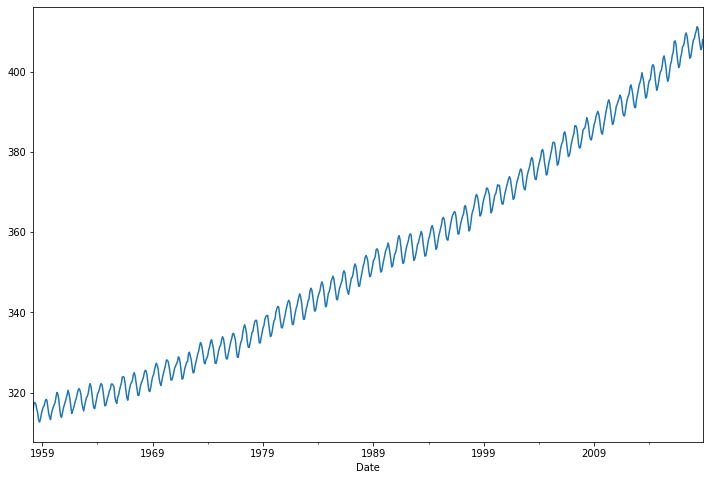

In [17]:
df['interpolated'].plot(figsize=(12,8))

In [18]:
result = seasonal_decompose(df['interpolated'],model='add');

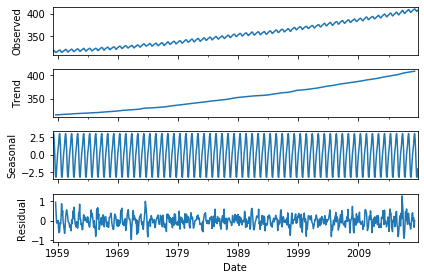

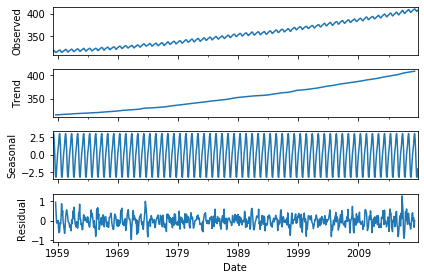

In [19]:
result.plot()

In [20]:
auto_arima(df['interpolated'],seasonal=True,m=12).summary()

/home/tim/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/tim/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/tim/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/tim/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/tim/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. C

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  729
Model:             SARIMAX(0, 1, 1)x(1, 0, 1, 12)   Log Likelihood                -209.339
Date:                            Mon, 10 Feb 2020   AIC                            428.679
Time:                                    06:44:18   BIC                            451.630
Sample:                                         0   HQIC                           437.535
                                            - 729                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    4.24e-05      0.000      0.358      0.720      -0.000       0.000
ma.L1         -0.3723      0.034    -10.832      0.000      -0.440      -0.305
ar.S.L12       0.9997      0.000   3175.520      0.000       0.999       1.000
ma.S.L12      -0.8658      0.022    -40.123      0.000      -0.908      -0.824
sigma2         0.0964      0.005     20.291      0.000       0.087       0.106
===================================================================================
Ljung-Box (Q):                       50.99   Jarque-Bera (JB):                 3.76
Prob(Q):                              0.11   Prob(JB):                         0.15
Heteroskedasticity (H):               1.12   Skew:                            -0.04
Prob(H) (two-sided):                  0.36   Kurtosis:                         3.34
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [21]:
train = df.iloc[:717]

In [22]:
test = df.iloc[717:]

In [23]:
model = SARIMAX(train['interpolated'],order=(0,1,1),seasonal_order=(1,0,1,12))

In [24]:
results = model.fit()

In [25]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                       interpolated   No. Observations:                  717
Model:             SARIMAX(0, 1, 1)x(1, 0, 1, 12)   Log Likelihood                -205.161
Date:                            Mon, 10 Feb 2020   AIC                            418.321
Time:                                    06:48:34   BIC                            436.616
Sample:                                03-01-1958   HQIC                           425.386
                                     - 11-01-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3698      0.034    -10.743      0.000      -0.437      -0.302
ar.S.L12       0.9996      0.000   3009.478      0.000       0.999       1.000
ma.S.L12      -0.8634      0.023    -37.230      0.000      -0.909      -0.818
sigma2         0.0962      0.005     20.164      0.000       0.087       0.106
===================================================================================
Ljung-Box (Q):                       51.94   Jarque-Bera (JB):                 3.70
Prob(Q):                              0.10   Prob(JB):                         0.16
Heteroskedasticity (H):               1.12   Skew:                            -0.02
Prob(H) (two-sided):                  0.36   Kurtosis:                         3.35
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [26]:
start = len(train)
end = len(train)+len(test)-1

In [27]:
predictions = results.predict(start, end, typ='levels').rename('SARIMA')

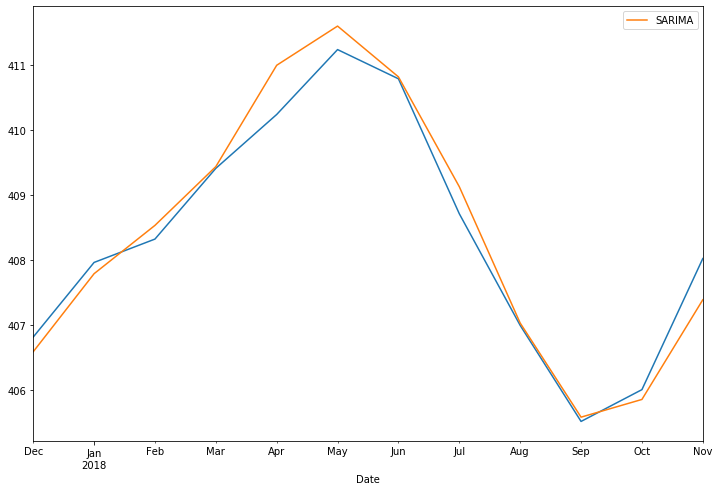

In [28]:
test['interpolated'].plot(figsize=(12,8))
predictions.plot(legend=True)

In [29]:
from statsmodels.tools.eval_measures import rmse

In [30]:
error =rmse(test['interpolated'],predictions)

In [31]:
error

0.3463160869488525

In [32]:
test['interpolated'].mean()

408.3333333333333

In [33]:
model = SARIMAX(df['interpolated'],order=(0,1,1),seasonal_order=(1,0,1,12))
results = model.fit()

In [34]:
fcast = results.predict(len(df),len(df)+11,typ='levels').rename('SARIMA')

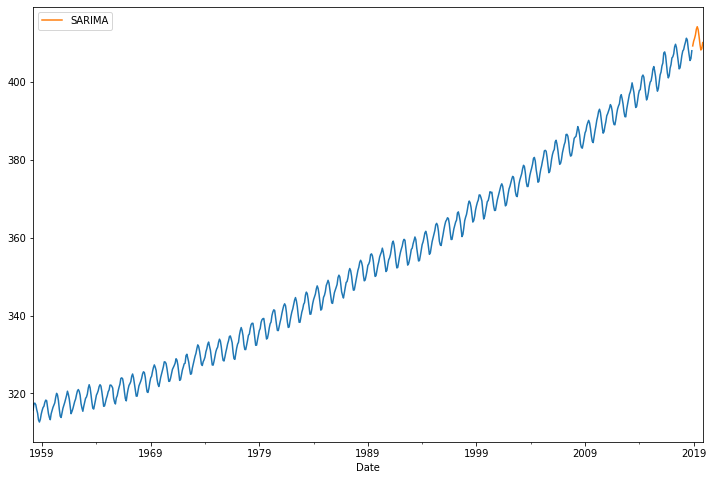

In [35]:
df['interpolated'].plot(figsize=(12,8))
fcast.plot(legend=True)